In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

import time

%matplotlib inline

In [ ]:
import pandas as pd
df = pd.read_csv('/content/power_actual.csv', parse_dates=['datetime'])
df.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [ ]:
df = df.groupby([df['datetime'].dt.year,df['datetime'].dt.month,df['datetime'].dt.day, df['datetime'].dt.hour]).sum()
df[0:50]

<ipython-input-131-52df8ec231ba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby([df['datetime'].dt.year,df['datetime'].dt.month,df['datetime'].dt.day, df['datetime'].dt.hour]).sum()


Unnamed: 0  ghi  gti  power
datetime datetime datetime datetime                             
2017     10       1        0                  6  0.0  0.0   0.00
                           1                 22  0.0  0.0   0.00
                           2                 38  0.0  0.0   0.00
                           3                 54  0.0  0.0   0.00
                           4                 70  0.0  0.0   0.00
                           5                 86  0.0  0.0   0.00
                           6                102  0.0  0.0   0.08
                           7                118  0.0  0.0   4.77
                           8                134  0.0  0.0  20.55
                           9                150  0.0  0.0  32.90
                           10               166  0.0  0.0  43.42
                           11               182  0.0  0.0  50.44
                           12               198  0.0  0.0  51.59
                           13               214  0.0  0.0  47.95
                           14               230  0.0  0.0  40.48
                           15               246  0.0  0.0  27.45
                           16               262  0.0  0.0  10.28
                           17               278  0.0  0.0   0.93
                           18               294  0.0  0.0   0.00
                           19               310  0.0  0.0   0.00
                           20               326  0.0  0.0   0.00
                           21               342  0.0  0.0   0.00
                           22               358  0.0  0.0   0.00
                           23               374  0.0  0.0   0.00
                  2        0                390  0.0  0.0   0.00
                           1                406  0.0  0.0   0.00
                           2                422  0.0  0.0   0.00
                           3                438  0.0  0.0   0.00
                           4                454  0.0  0.0   0.00
                           5                470  0.0  0.0   0.00
                           6                486  0.0  0.0   0.08
                           7                502  0.0  0.0   4.77
                           8                518  0.0  0.0  20.55
                           9                534  0.0  0.0  32.90
                           10               550  0.0  0.0  43.42
                           11               566  0.0  0.0  50.44
                           12               582  0.0  0.0  51.59
                           13               598  0.0  0.0  47.95
                           14               614  0.0  0.0  40.48
                           15               630  0.0  0.0  27.45
                           16               646  0.0  0.0  10.28
                           17               662  0.0  0.0   0.93
                           18               678  0.0  0.0   0.00
                           19               694  0.0  0.0   0.00
                           20               710  0.0  0.0   0.00
                           21               726  0.0  0.0   0.00
                           22               742  0.0  0.0   0.00
                           23               758  0.0  0.0   0.00
                  3        0                774  0.0  0.0   0.00
                           1                790  0.0  0.0   0.00

In [ ]:
df.tail(20)

Unnamed: 0  ghi  gti  power
datetime datetime datetime datetime                             
2019     9        30       4             280006  0.0  0.0    0.0
                           5             280022  0.0  0.0    0.0
                           6             280038  0.0  0.0    0.0
                           7             280054  0.0  0.0    0.0
                           8             280070  0.0  0.0    0.0
                           9             280086  0.0  0.0    0.0
                           10            280102  0.0  0.0    0.0
                           11            280118  0.0  0.0    0.0
                           12            280134  0.0  0.0    0.0
                           13            280150  0.0  0.0    0.0
                           14            280166  0.0  0.0    0.0
                           15            280182  0.0  0.0    0.0
                           16            280198  0.0  0.0    0.0
                           17            280214  0.0  0.0    0.0
                           18            280230  0.0  0.0    0.0
                           19            280246  0.0  0.0    0.0
                           20            280262  0.0  0.0    0.0
                           21            280278  0.0  0.0    0.0
                           22            280294  0.0  0.0    0.0
                           23            280310  0.0  0.0    0.0

In [ ]:
df1 = pd.DataFrame({'year':[i for i,j,k,l in df.index],
                  'month':[j for i,j,k,l in df.index],
                  'day':[k for i,j,k,l in df.index],
                  'hour':[l for i,j,k,l in df.index]})
df1 = pd.to_datetime(df1)
df1

0       2017-10-01 00:00:00
1       2017-10-01 01:00:00
2       2017-10-01 02:00:00
3       2017-10-01 03:00:00
4       2017-10-01 04:00:00
                ...        
17515   2019-09-30 19:00:00
17516   2019-09-30 20:00:00
17517   2019-09-30 21:00:00
17518   2019-09-30 22:00:00
17519   2019-09-30 23:00:00
Length: 17520, dtype: datetime64[ns]

In [ ]:
df = pd.DataFrame({'datetime': df1, 'power': [i for i in df.power]})
df[0:100]

,datetime,power
0,2017-10-01 00:00:00,0.00
1,2017-10-01 01:00:00,0.00
2,2017-10-01 02:00:00,0.00
3,2017-10-01 03:00:00,0.00
4,2017-10-01 04:00:00,0.00
5,2017-10-01 05:00:00,0.00
6,2017-10-01 06:00:00,0.08
7,2017-10-01 07:00:00,4.77
8,2017-10-01 08:00:00,20.55
9,2017-10-01 09:00:00,32.90


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Draw Plot
def plot_df(df, x, y, title="", xlabel='DateTime', ylabel='Power', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.datetime, y=df.power, title='Daywise with a difference of 15 min power generation between oct-2017 to sept-2019')

**Predictors over time**

                datetime  power
1    2017-10-01 01:00:00   0.00
2    2017-10-01 02:00:00   0.00
3    2017-10-01 03:00:00   0.00
4    2017-10-01 04:00:00   0.00
5    2017-10-01 05:00:00   0.00
6    2017-10-01 06:00:00   0.08
7    2017-10-01 07:00:00   4.77
8    2017-10-01 08:00:00  20.55
9    2017-10-01 09:00:00  32.90
10   2017-10-01 10:00:00  43.42
11   2017-10-01 11:00:00  50.44
12   2017-10-01 12:00:00  51.59
13   2017-10-01 13:00:00  47.95
14   2017-10-01 14:00:00  40.48
15   2017-10-01 15:00:00  27.45
16   2017-10-01 16:00:00  10.28
17   2017-10-01 17:00:00   0.93
18   2017-10-01 18:00:00   0.00
19   2017-10-01 19:00:00   0.00
20   2017-10-01 20:00:00   0.00
21   2017-10-01 21:00:00   0.00
22   2017-10-01 22:00:00   0.00
23   2017-10-01 23:00:00   0.00
24   2017-10-02 00:00:00   0.00
25   2017-10-02 01:00:00   0.00
26   2017-10-02 02:00:00   0.00
27   2017-10-02 03:00:00   0.00
28   2017-10-02 04:00:00   0.00
29   2017-10-02 05:00:00   0.00
30   2017-10-02 06:00:00   0.08
31   201

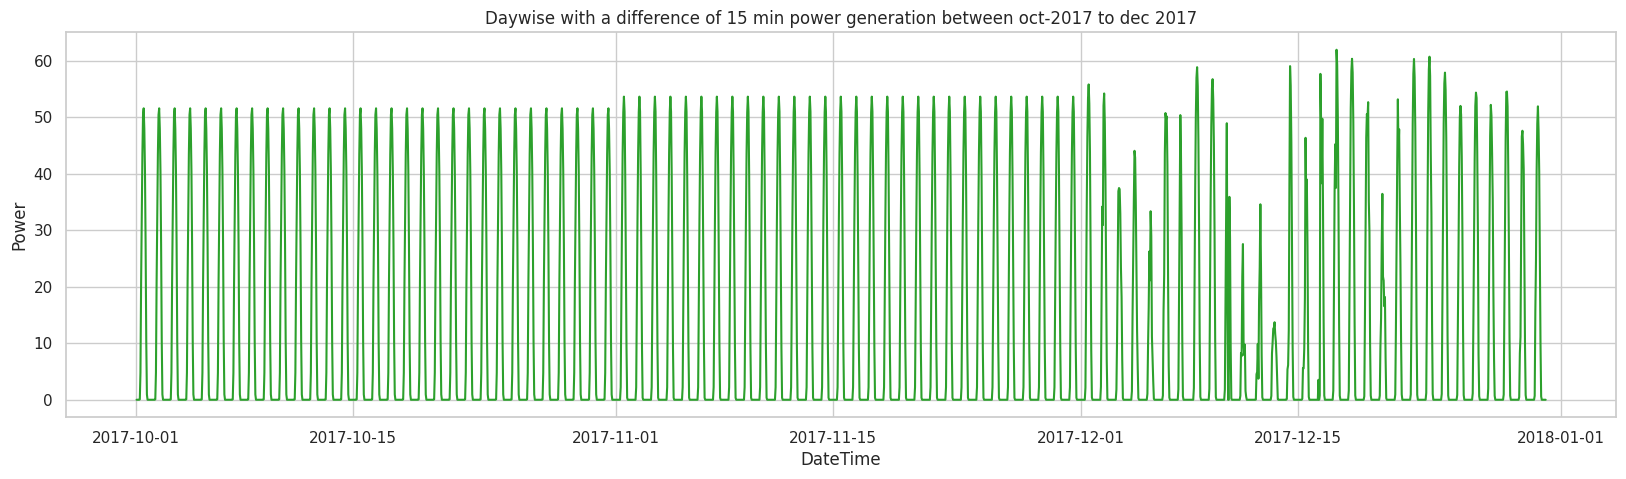

In [ ]:
start_date = '2017-10-01'
end_date = '2017-12-31'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec 2017')

Clearly, Power plant would generate power daily increasing from 06:00:00 decreasing to 17:00:00, As we see this is series of data repeting same structure daily

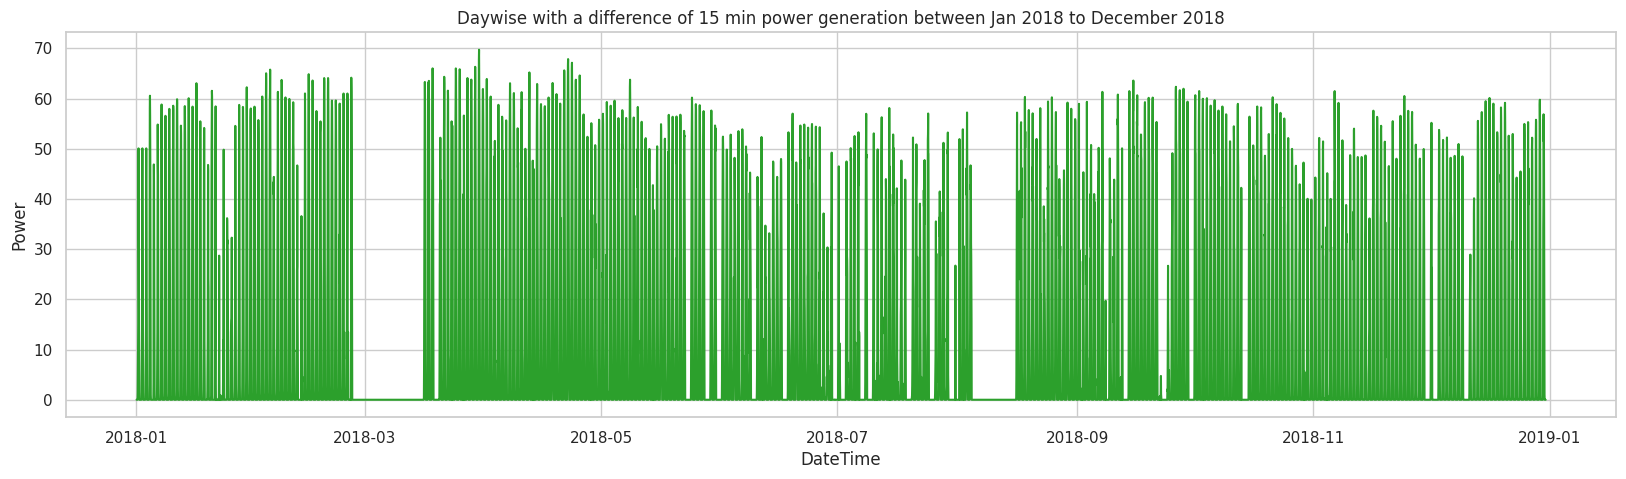

In [ ]:

start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
# df_mask
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between Jan 2018 to December 2018')

                 datetime  power
10969 2019-01-01 01:00:00    0.0
10970 2019-01-01 02:00:00    0.0
10971 2019-01-01 03:00:00    0.0
10972 2019-01-01 04:00:00    0.0
10973 2019-01-01 05:00:00    0.0
...                   ...    ...
15308 2019-06-30 20:00:00    0.0
15309 2019-06-30 21:00:00    0.0
15310 2019-06-30 22:00:00    0.0
15311 2019-06-30 23:00:00    0.0
15312 2019-07-01 00:00:00    0.0

[4344 rows x 2 columns]


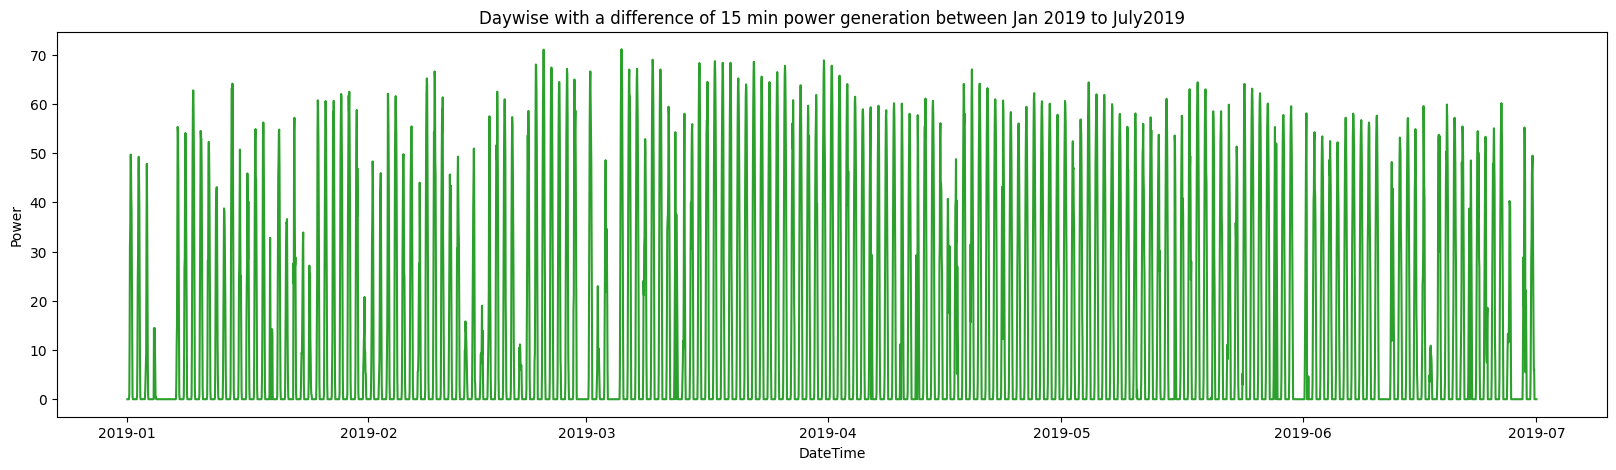

In [ ]:
start_date = '2019-01-01'
end_date = '2019-07-01'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between Jan 2019 to July2019')

                 datetime  power
15841 2019-07-23 01:00:00    0.0
15842 2019-07-23 02:00:00    0.0
15843 2019-07-23 03:00:00    0.0
15844 2019-07-23 04:00:00    0.0
15845 2019-07-23 05:00:00    0.0
...                   ...    ...
16508 2019-08-19 20:00:00    0.0
16509 2019-08-19 21:00:00    0.0
16510 2019-08-19 22:00:00    0.0
16511 2019-08-19 23:00:00    0.0
16512 2019-08-20 00:00:00    0.0

[672 rows x 2 columns]


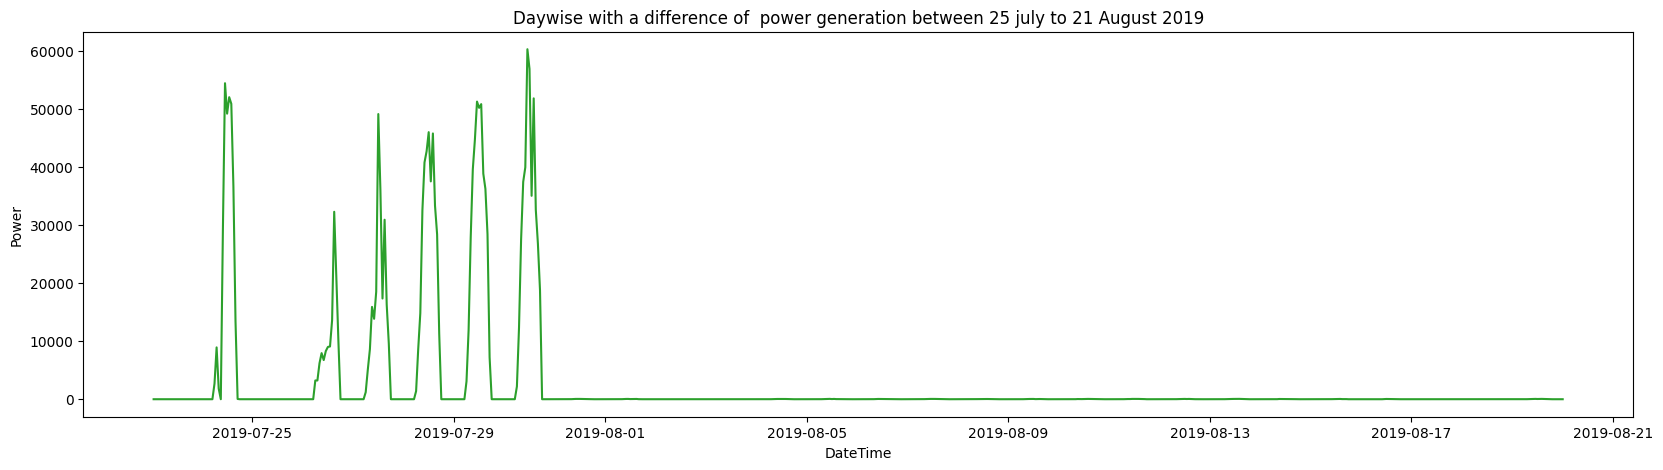

In [ ]:


start_date = '2019-07-23'
end_date = '2019-08-20'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of  power generation between 25 july to 21 August 2019')

outliers also having the same series of power generation, values ranging from 0-60000

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)

**Data Preparation**

Removing extra rows

In [ ]:
print(df.shape)
df_weather_actual = pd.read_csv('/content/weather_actuals.csv')
print(df_weather_actual.shape)

(17520, 2)
(13619, 31)


In [ ]:
start_date = '2018-03-12 23:00:00'
end_date = '2018-08-15 13:00:00'
df_drop_extra_rows = df
mask = (df_drop_extra_rows.datetime > start_date) & (df_drop_extra_rows.datetime < end_date)
df_mask = df_drop_extra_rows.loc[mask]

In [ ]:
df_drop_extra_rows.drop(df_mask.index, inplace=True)


In [ ]:

start_date = '2018-02-27 23:00:00'
end_date = '2018-03-07 00:00:00'
mask = (df_drop_extra_rows.datetime > start_date) & (df_drop_extra_rows.datetime < end_date)
df_mask = df_drop_extra_rows.loc[mask]
# print(df_mask.shape)
df_drop_extra_rows.drop(df_mask.index, inplace=True)

In [ ]:
df_drop_extra_rows


,datetime,power
0,2017-10-01 00:00:00,0.0
1,2017-10-01 01:00:00,0.0
2,2017-10-01 02:00:00,0.0
3,2017-10-01 03:00:00,0.0
4,2017-10-01 04:00:00,0.0
...,...,...
17515,2019-09-30 19:00:00,0.0
17516,2019-09-30 20:00:00,0.0
17517,2019-09-30 21:00:00,0.0
17518,2019-09-30 22:00:00,0.0


In [ ]:
print(df_drop_extra_rows.shape)
df_weather_actual = pd.read_csv('/content/weather_actuals.csv')
print(df_weather_actual.shape)

(13619, 2)
(13619, 31)


In [ ]:
df_drop_extra_rows.to_csv('power_actual_filter_rows.csv', index = False, header = True)


Removing null values from data


In [ ]:
df_weather_actual.isna().sum()


Unnamed: 0                 0
plant_id                   0
datetime_utc               0
datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_chill              9875
wind_gust                  0
heat_index              9875
pressure                   0
qpf                     9875
uv_index                   0
snow                    9875
pop                     9875
fctcode                 9875
ozone                      0
precip_accumulation     9875
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
dtype: int64

In [ ]:
df_weather_actual = df_weather_actual.drop(columns=['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation','precip_type'])
df_weather_actual.shape

(13619, 23)

In [ ]:
import numpy as np
df_weather_actual.replace(to_replace = -9999, value =np.nan, inplace=True)

In [ ]:
num_cols = ['cloud_cover','wind_bearing','wind_speed','wind_gust','pressure','uv_index','ozone','precip_intensity','precip_intensity','precip_probability','visibility']

In [ ]:
def replace_missing_numeral(cols):
    for col in cols:
        med = df_weather_actual[col].median()
        df_weather_actual[col].replace(to_replace = np.nan, value =med, inplace=True)

replace_missing_numeral(num_cols)

In [ ]:
print(df_weather_actual.isna().sum())

Unnamed: 0              0
plant_id                0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
power                   0
dtype: int64


In [ ]:
df_weather_actual['power'] = df_drop_extra_rows['power']
df_weather_actual.to_csv('weather_actuals_prepared1', index = False, header = True)

In [ ]:
import pandas as pd
df_weather_actual = pd.read_csv('/content/weather_actuals_prepared1')
df_drop_extra_rows = pd.read_csv('/content/power_actual_filter_rows.csv')

In [ ]:
df_weather_actual.describe()


,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
count,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,6809.000000,1.0,0.230410,25.944639,24.498054,0.537411,11.924626,187.991556,2.632430,4.124168,1009.158090,1.422792,274.732996,0.044296,0.013990,12.340082,143.919009
std,3931.610993,0.0,0.339787,10.469808,8.840016,0.498617,9.129459,107.114078,1.255545,1.910843,7.126798,2.673136,13.303920,0.220387,0.049137,6.185988,2212.846024
min,0.000000,1.0,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,0.630000,991.660000,0.000000,225.800000,0.000000,0.000000,0.000000,0.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,96.000000,1.810000,3.015000,1003.500000,0.000000,270.300000,0.000000,0.000000,3.780000,0.000000
50%,6809.000000,1.0,0.010000,25.540000,25.000000,1.000000,10.710000,177.000000,2.520000,3.740000,1009.600000,0.000000,275.600000,0.000000,0.000000,16.090000,0.000000
75%,10213.500000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,24.550000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,60366.740000


In [ ]:
df_weather_actual.isna().sum()

Unnamed: 0              0
plant_id                0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
power                   0
dtype: int64

In [ ]:
mask = (df_weather_actual.datetime_local >= '2019-07-15 06:00:00') & (df_weather_actual.datetime_local <= '2019-07-15 17:00:00')
df_replace_outlier = df_weather_actual[mask]
print(df_replace_outlier['power'])
# df_drop_extra_rows.drop(df_mask.index, inplace=True)

# mask = (df_weather_actual.datetime_local >= start_date) & (df_weather_actual.datetime_local <= end_date)
# df_mask = df_weather_actual.loc[mask]
# print(df_mask.shape)

11753     1.90
11754     7.83
11755    14.68
11756    16.40
11757    15.49
11758     3.97
11759     1.30
11760    17.69
11761    46.12
11762    35.68
11763    24.46
11764    12.15
Name: power, dtype: float64


In [ ]:
outliers_date = ['2019-07-24', '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29', '2019-07-30']

for date in outliers_date:
    from_datetime = date + ' 06:00:00'
    to_datetime = date + ' 17:00:00'
    mask = (df_weather_actual.datetime_local >= from_datetime) & (df_weather_actual.datetime_local <= to_datetime)
    df_weather_actual['power'].loc[mask] = [x for x in df_replace_outlier['power']]
    print(df_weather_actual['power'].loc[mask])


11969     1.90
11970     7.83
11971    14.68
11972    16.40
11973    15.49
11974     3.97
11975     1.30
11976    17.69
11977    46.12
11978    35.68
11979    24.46
11980    12.15
Name: power, dtype: float64
12017     1.90
12018     7.83
12019    14.68
12020    16.40
12021    15.49
12022     3.97
12023     1.30
12024    17.69
12025    46.12
12026    35.68
12027    24.46
12028    12.15
Name: power, dtype: float64
12041     1.90
12042     7.83
12043    14.68
12044    16.40
12045    15.49
12046     3.97
12047     1.30
12048    17.69
12049    46.12
12050    35.68
12051    24.46
12052    12.15
Name: power, dtype: float64
12065     1.90
12066     7.83
12067    14.68
12068    16.40
12069    15.49
12070     3.97
12071     1.30
12072    17.69
12073    46.12
12074    35.68
12075    24.46
12076    12.15
Name: power, dtype: float64
12089     1.90
12090     7.83
12091    14.68
12092    16.40
12093    15.49
12094     3.97
12095     1.30
12096    17.69
12097    46.12
12098    35.68
12099    24.46
121

<ipython-input-82-75974a2aab4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_actual['power'].loc[mask] = [x for x in df_replace_outlier['power']]


In [ ]:
df_weather_actual.describe()


,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
count,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,6809.000000,1.0,0.230410,25.944639,24.498054,0.537411,11.924626,187.991556,2.632430,4.124168,1009.158090,1.422792,274.732996,0.044296,0.013990,12.340082,12.578598
std,3931.610993,0.0,0.339787,10.469808,8.840016,0.498617,9.129459,107.114078,1.255545,1.910843,7.126798,2.673136,13.303920,0.220387,0.049137,6.185988,19.416265
min,0.000000,1.0,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,0.630000,991.660000,0.000000,225.800000,0.000000,0.000000,0.000000,0.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,96.000000,1.810000,3.015000,1003.500000,0.000000,270.300000,0.000000,0.000000,3.780000,0.000000
50%,6809.000000,1.0,0.010000,25.540000,25.000000,1.000000,10.710000,177.000000,2.520000,3.740000,1009.600000,0.000000,275.600000,0.000000,0.000000,16.090000,0.000000
75%,10213.500000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,23.805000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,71.090000


In [ ]:
df_weather_actual.to_csv('weather_actuals_prepared1.csv', index = False, header = True)

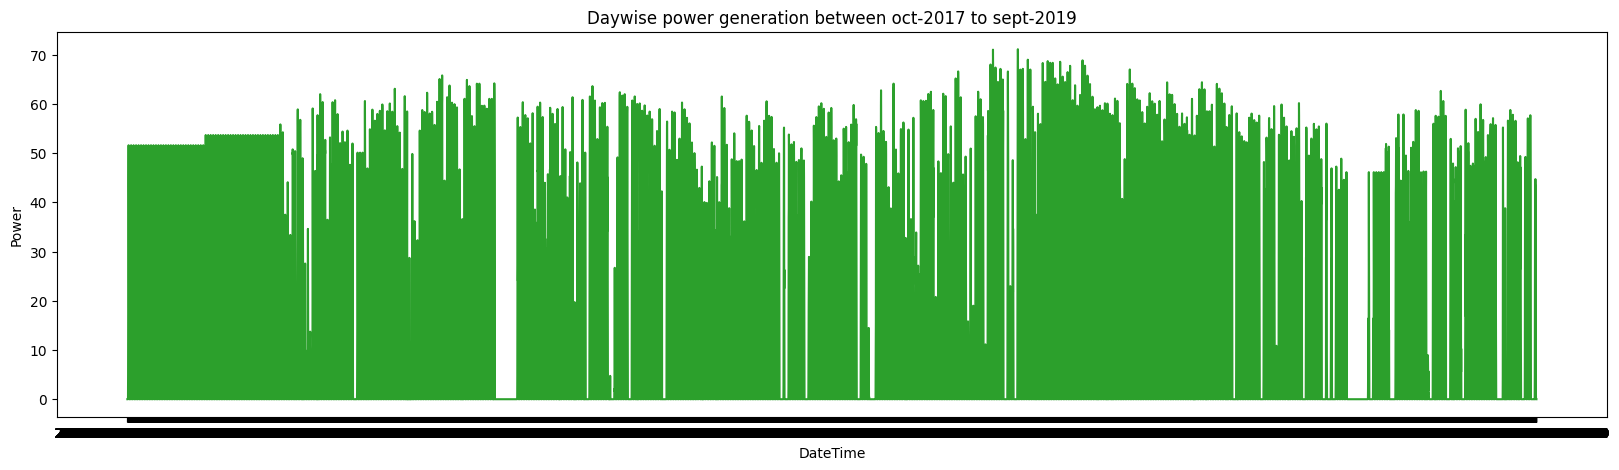

In [ ]:
start_date = '2017-10-01'
end_date = '2019-09-30'
mask = (df_weather_actual.datetime_local > start_date) & (df_weather_actual.datetime_local <= end_date)
df_mask = df_weather_actual.loc[mask]
plot_df(df_mask, x=df_mask.datetime_local, y=df_mask.power, title='Daywise power generation between oct-2017 to sept-2019')

**EDA for numerical features**

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


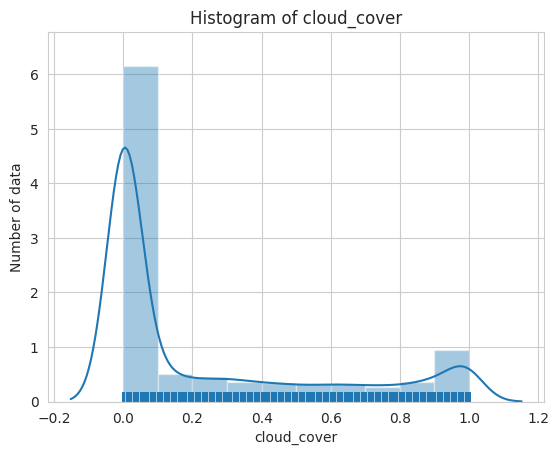

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


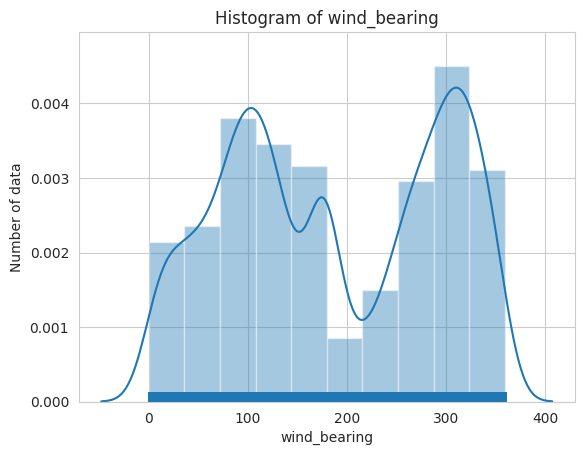

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


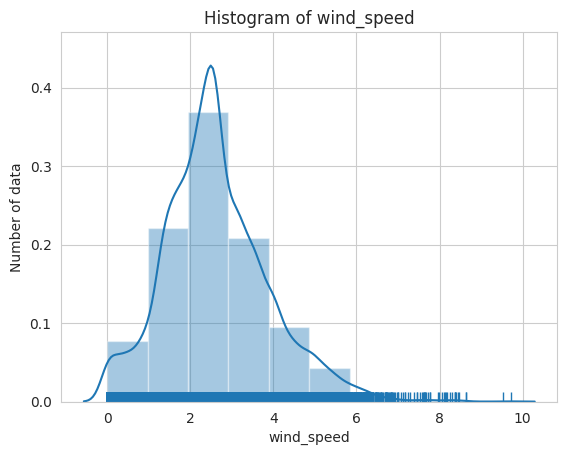

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


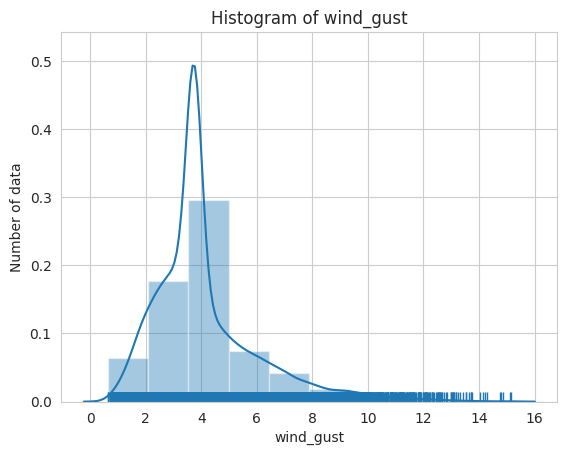

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


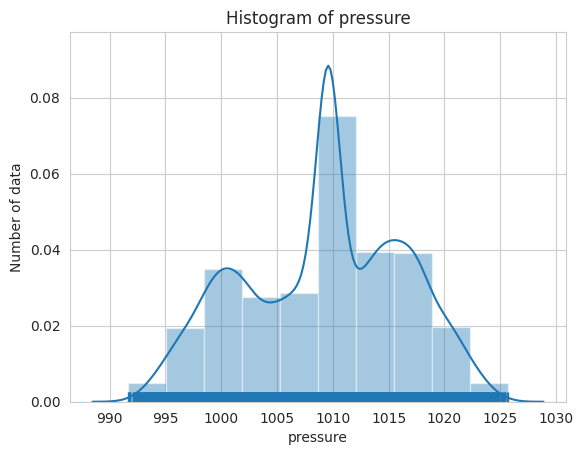

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


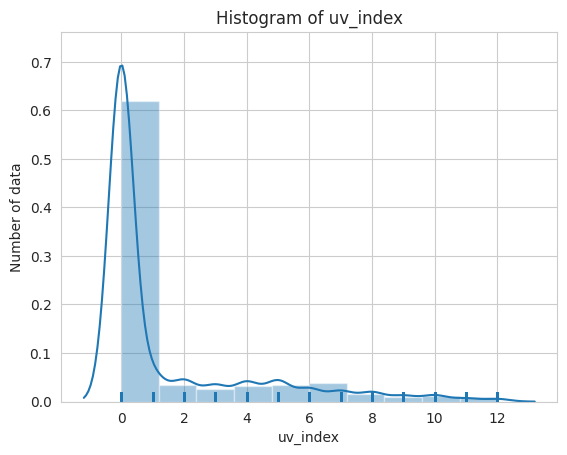

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


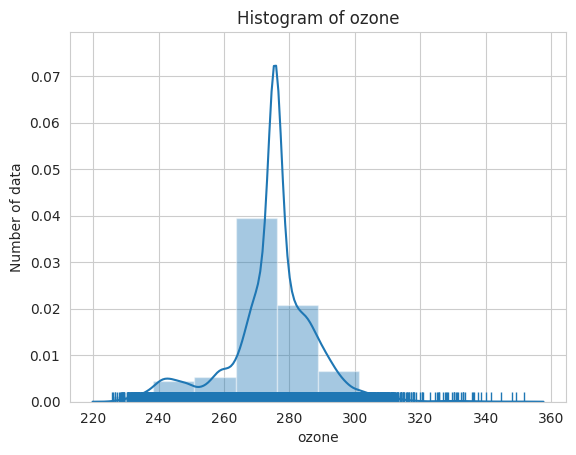

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


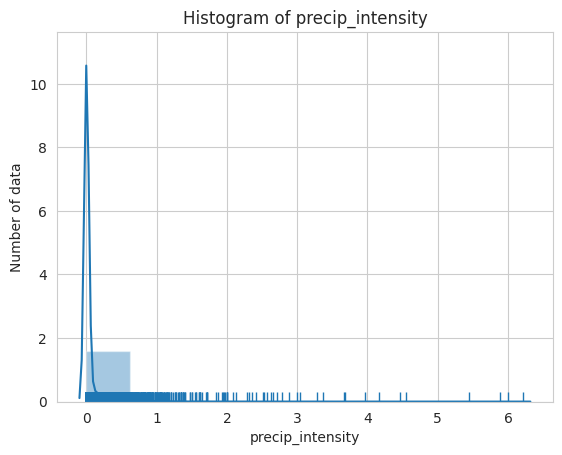

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


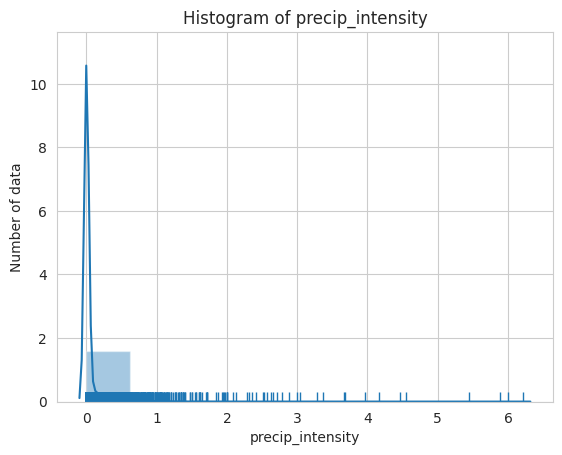

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


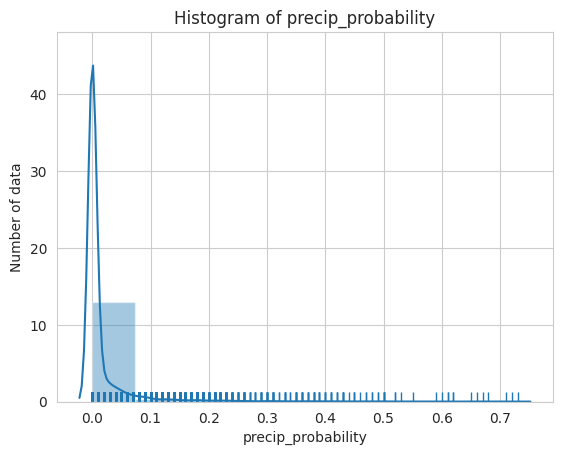

<ipython-input-53-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


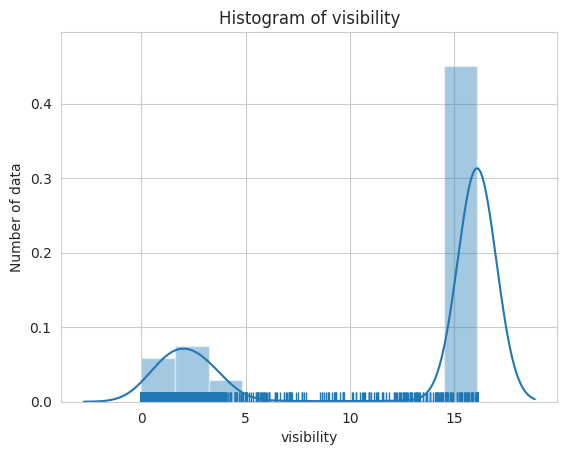

In [ ]:
def plot_density_hist(df_weather_actual, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of data')# Set text for y axis
        plt.show()

plot_density_hist(df_weather_actual, num_cols, hist=True)

<ipython-input-54-ff3e934907a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)


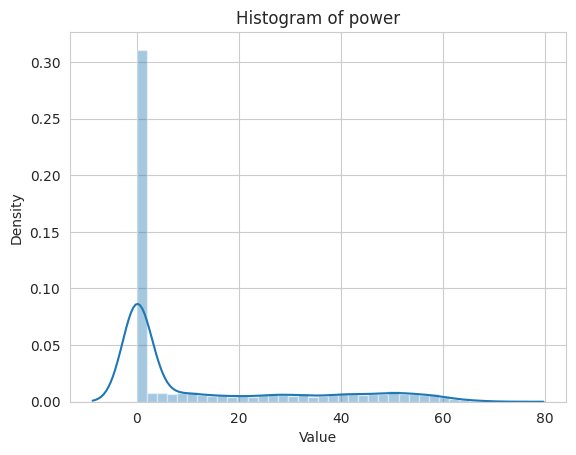

In [ ]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

#labels = np.array(auto_prices['price'])
hist_plot(df_weather_actual['power'], 'power')

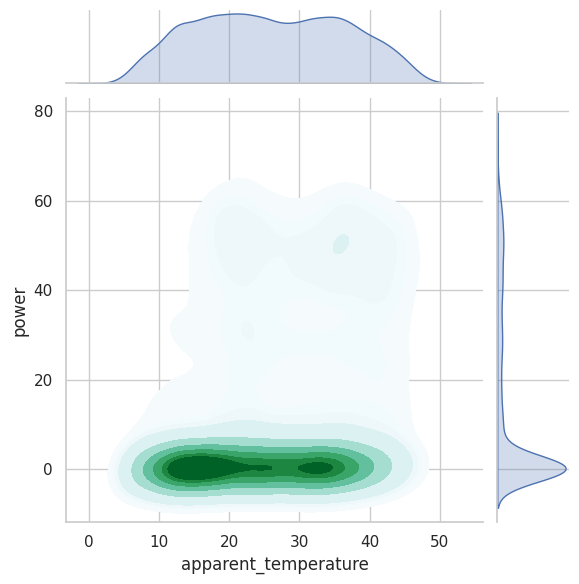

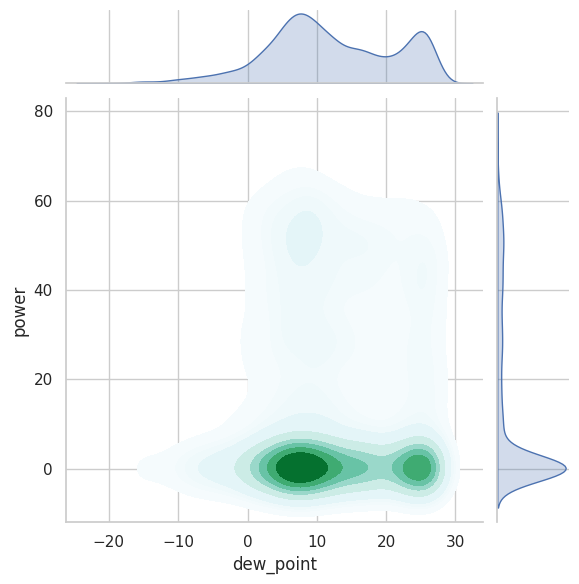

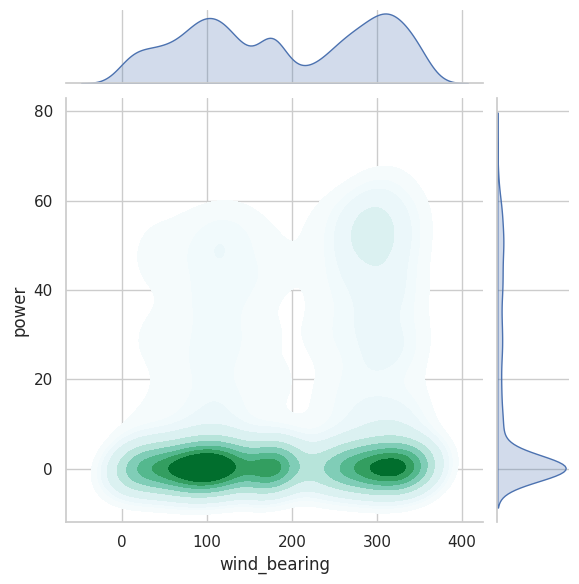

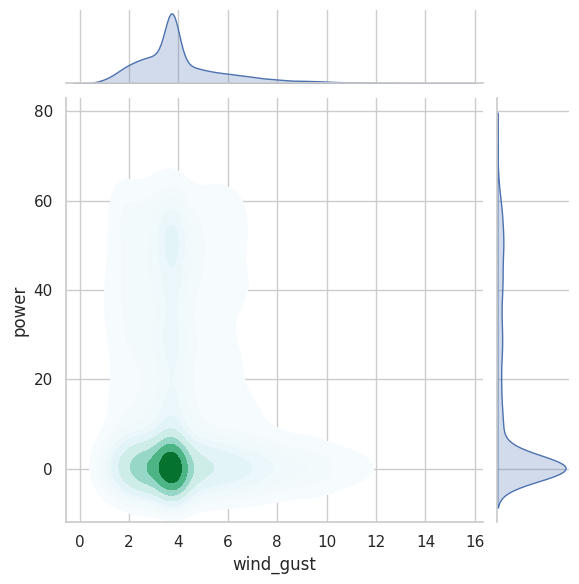

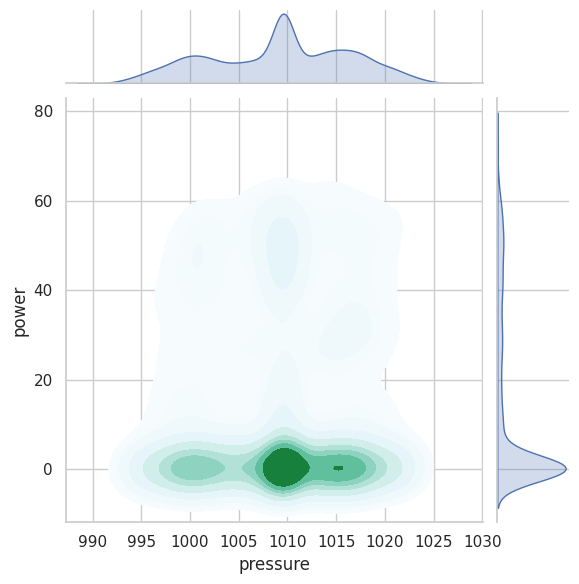

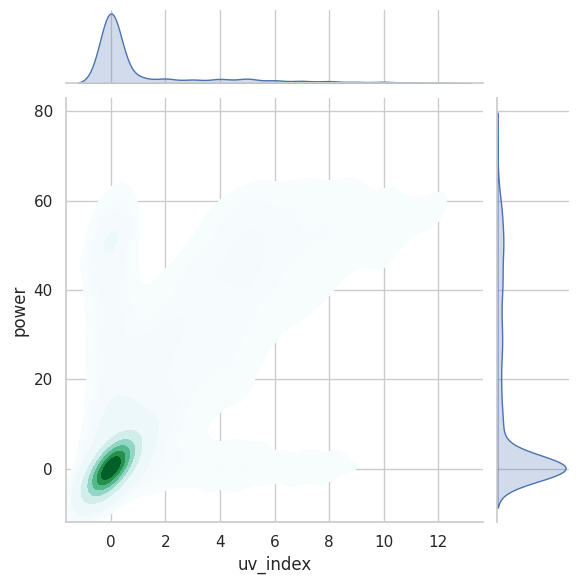

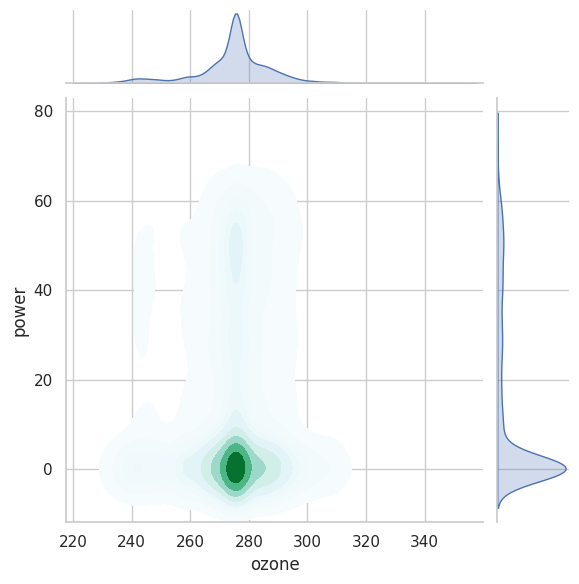

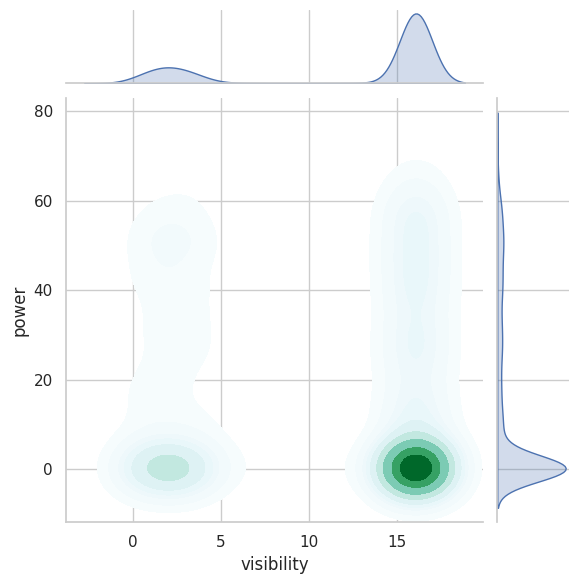

ValueError: ignored

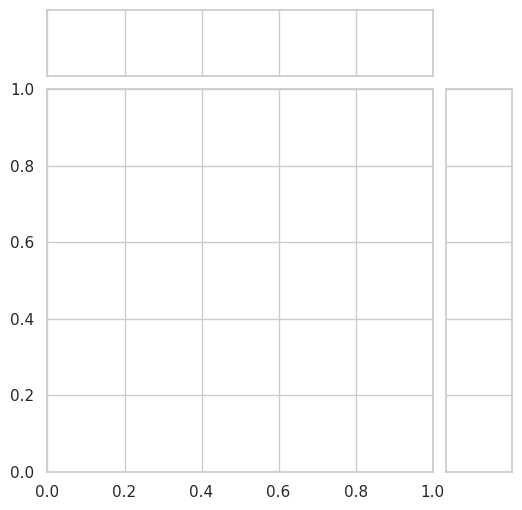

In [ ]:
def plot_density_2d(df, cols, col_y='power', kind='kde'):
    sns.set(style="whitegrid")
    for col in cols:
        g = sns.jointplot(data=df, x=col, y=col_y, kind=kind, cmap='BuGn', fill=True)
        g.set_axis_labels(col, col_y)
        plt.show()

plot_density_2d(df_weather_actual, num_cols)


In [ ]:
weather_act = df_weather_actual.drop(columns=['plant_id','wind_bearing','wind_speed','wind_gust','pressure','humidity','Unnamed: 0'])

<ipython-input-56-916e4183029b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_act.corr(), cmap='Blues', annot=True)


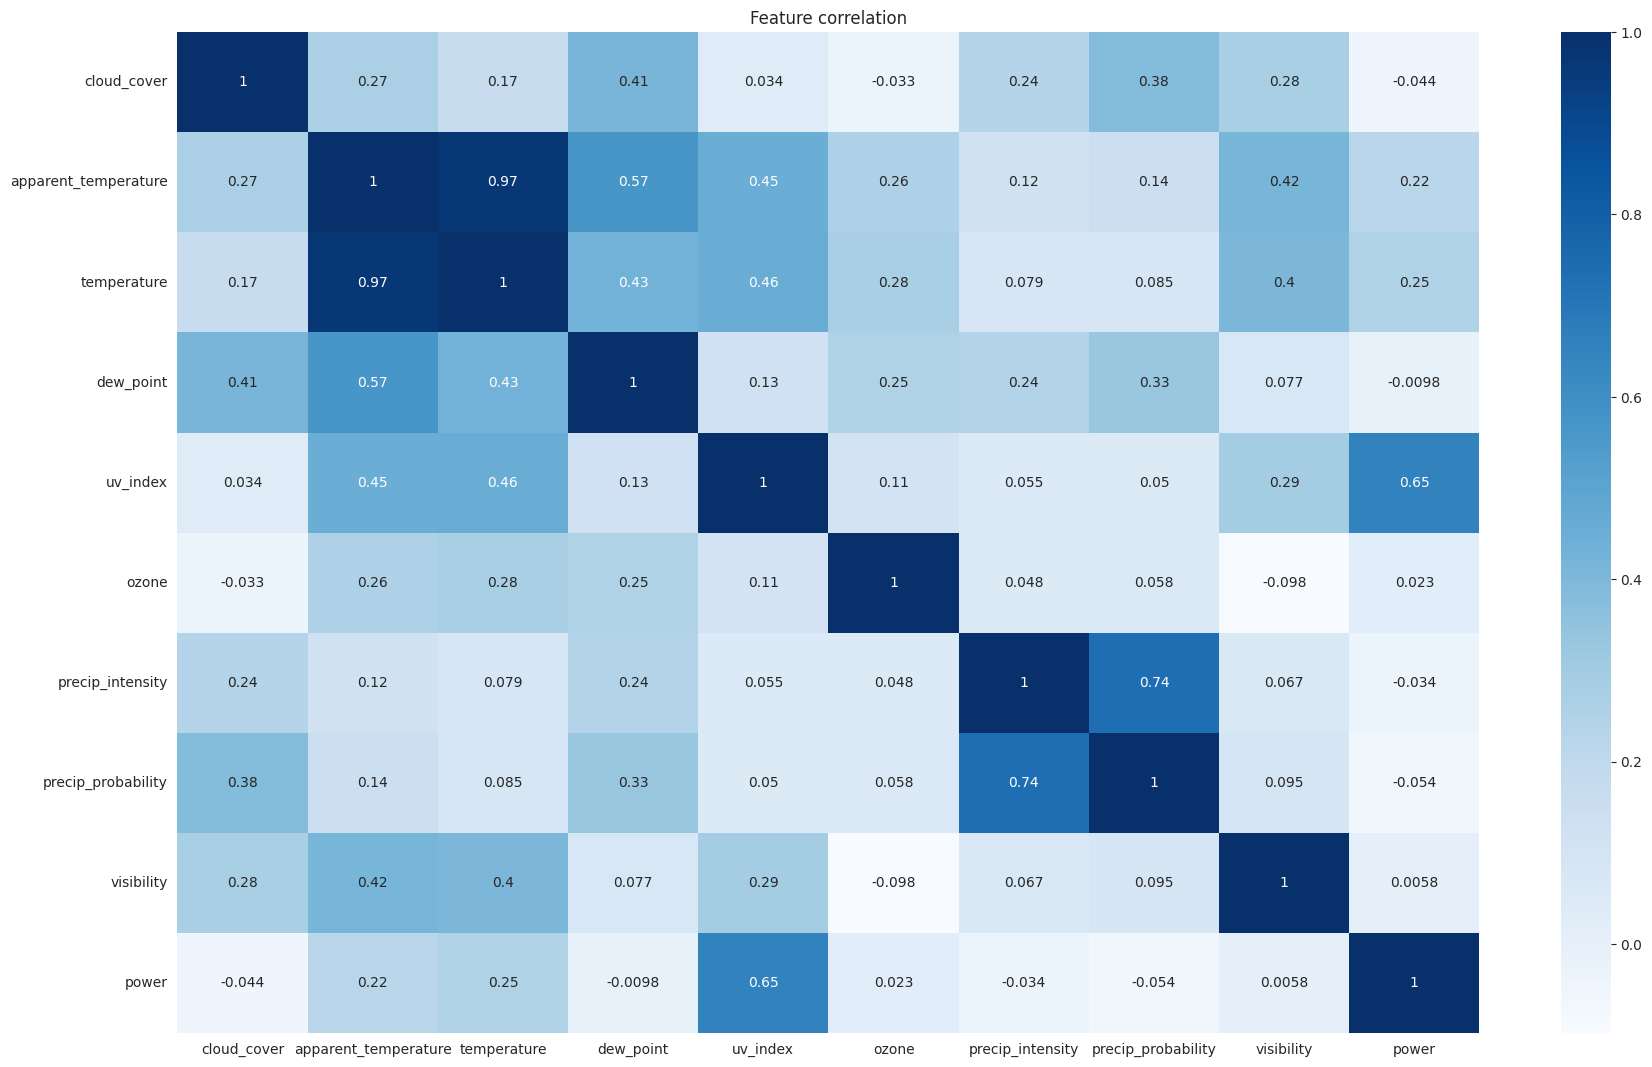

In [ ]:
plt.figure(figsize=(21, 13))
sns.heatmap(weather_act.corr(), cmap='Blues', annot=True)
plt.title('Feature correlation');

uv_index contributes more to power.
apprent_temperature and temperature are similar, we can take any one of them while model building
all other features contributes to power but less

Applying Linear Regression


In [ ]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [ ]:
print(df_weather_actual['icon'].value_counts())
print(df_weather_actual['summary'].value_counts())
print(df_weather_actual['humidity'].value_counts())

clear-night            3075
clear-day              2997
fog                    2920
partly-cloudy-day      1768
partly-cloudy-night    1458
cloudy                 1305
rain                     94
wind                      2
Name: icon, dtype: int64
Clear                            5567
Foggy                            2918
Partly Cloudy                    1179
Humid and Mostly Cloudy           826
Humid and Overcast                714
Mostly Cloudy                     638
Overcast                          591
Humid and Partly Cloudy           583
Humid                             505
Possible Light Rain and Humid      52
Possible Light Rain                20
Rain and Humid                     13
Light Rain and Humid                4
Humid and Foggy                     2
Rain                                2
Breezy and Foggy                    2
Light Rain                          1
Possible Drizzle and Humid          1
Possible Drizzle                    1
Name: summary, dtype: int64
1

In [ ]:
print(df_weather_actual['icon'].unique())
Features = df_weather_actual['icon']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['clear-night' 'fog' 'clear-day' 'partly-cloudy-day' 'partly-cloudy-night'
 'wind' 'cloudy' 'rain']
[1 3 3 ... 5 5 5]


In [ ]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
print(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

[[1]
 [3]
 [3]
 ...
 [5]
 [5]
 [5]]


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:


def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()


categorical_columns = ['humidity']

for col in categorical_columns:
    temp = encode_string(df_weather_actual[col])
    Features = np.concatenate([Features, temp], axis = 1)
    #print(Features)

print(Features.shape)
print(Features[:2, :])

(13619, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]


In [ ]:
Features = np.concatenate([Features, np.array(df_weather_actual[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])], axis = 1)
Features[:2,:]

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.6520e+01, 1.9460e+01, 3.0800e+02, 3.7400e+00, 1.0079e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.5700e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.8780e+01, 2.0060e+01, 1.7700e+02, 3.7400e+00, 1.0096e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.0600e+00]])

**Split the dataset into training and Testing**


In [ ]:
## Randomly sample cases to create independent training and test data
nr.seed(9922)
labels = np.array(df_weather_actual['power'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.25)
# print(indx)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train[:,10:])
x_train[:,10:] = scaler.transform(x_train[:,10:])
x_test[:,10:] = scaler.transform(x_test[:,10:])
print(x_train.shape)
x_train[:10,:]


(10214, 19)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.15409846,  0.03586713, -0.91935444, -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.42906665],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.37280275,  1.53016334, -0.91935444, -0.0062695 , -1.15013152,
        -0.53378234, -0.45787869, -0.28499319,  0.60281425],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.94201072,  0.03586713,  0.7647048 , -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.79334808],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.857

In [ ]:
## define and fit the linear regression model
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

# New Section

In [ ]:
y_pred = lin_mod.predict(x_test)

In [ ]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_pred)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)


    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_pred)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_pred))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_pred)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_pred)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

    return sklm.mean_squared_error(y_true, y_pred), r2

y_score = lin_mod.predict(x_test)
y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics(y_test, y_score, 28)

Mean Square Error      = 161.71993155646038
Root Mean Square Error = 12.716915174540576
Mean Absolute Error    = 9.084107236731501
Median Absolute Error  = 6.378763568279876
R^2                    = 0.5712701874444992
Adjusted R^2           = 0.5678423802372151


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

For k = 1 MSE: 159.42559048458148 RMSE: 12.626384695730662 R^2: 0.5773526313845748
For k = 2 MSE: 122.57574081497798 RMSE: 11.071392903107448 R^2: 0.6750439239141651
For k = 3 MSE: 113.20179696524718 RMSE: 10.63963330971736 R^2: 0.6998948445825168
For k = 4 MSE: 111.6517848623348 RMSE: 10.566540818183347 R^2: 0.7040040251389554
For k = 5 MSE: 109.41986079060206 RMSE: 10.460394867814601 R^2: 0.7099209976463177
For k = 6 MSE: 109.87576029450156 RMSE: 10.482163912785449 R^2: 0.7087123790983761
For k = 7 MSE: 110.48737215019929 RMSE: 10.51129735809045 R^2: 0.7070909572134771
For k = 8 MSE: 111.42223719208882 RMSE: 10.55567322306298 R^2: 0.7046125705958446
For k = 9 MSE: 112.92146953499756 RMSE: 10.626451408395821 R^2: 0.7006380104091925
For k = 10 MSE: 114.13735561703376 RMSE: 10.683508581783128 R^2: 0.6974146191609825
For k = 11 MSE: 115.17291504350676 RMSE: 10.73186447191292 R^2: 0.6946692853327472
For k = 12 MSE: 116.05432879996737 RMSE: 10.772851470245348 R^2: 0.6923326014685243
For k 

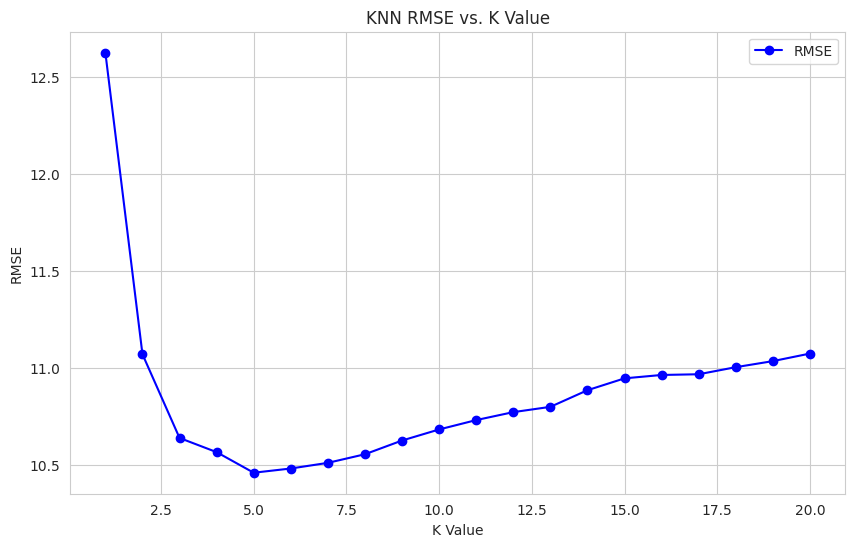

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Create a range of K values (e.g., 1 to 20)
K_values = range(1, 21)

# Initialize empty lists to store error values
mse_val = []
rmse_val = []
r2_val = []

# Train the KNN model for each K value and compute errors
for K in K_values:
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train)

    pred = model.predict(x_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, pred)
    mse_val.append(mse)

    # Calculate RMSE
    rmse = sqrt(mse)
    rmse_val.append(rmse)

    # Calculate R-squared
    r2 = r2_score(y_test, pred)
    r2_val.append(r2)

    print('For k =', K, 'MSE:', mse, 'RMSE:', rmse, 'R^2:', r2)

# Plot the KNN graph for RMSE
plt.figure(figsize=(10, 6))
plt.plot(K_values, rmse_val, marker='o', linestyle='-', color='b', label='RMSE')
plt.title('KNN RMSE vs. K Value')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

# Optionally, you can also plot the MSE and R^2 values similarly


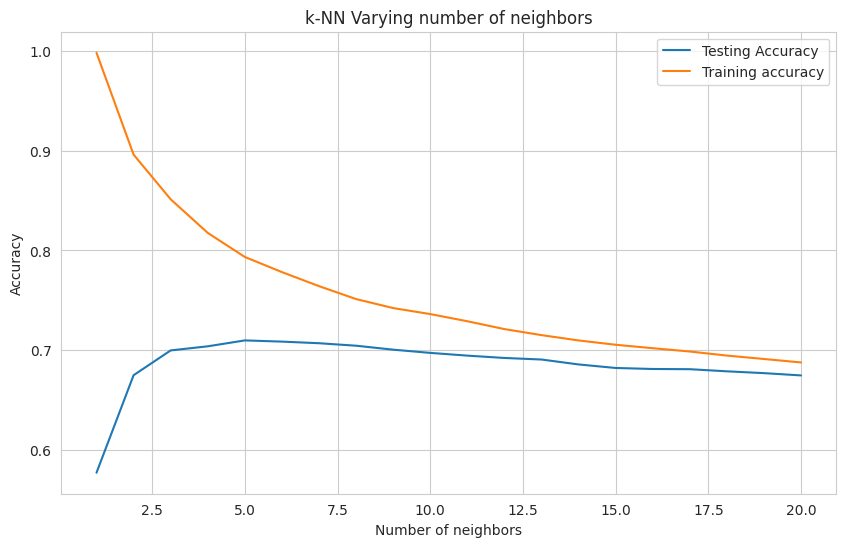

In [ ]:
# For the KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Setup arrays to store training and test accuracies
neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)

    knn.fit(x_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.figure(figsize=(10, 6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,5,7,9,11]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_



{'n_neighbors': 5}

In [ ]:
# Implement the KNN algorithm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

Implementation Of Decision Tree Algorithim

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create and fit the Decision Tree model with max_depth=3
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(x_train, y_train)

# Implement GridSearchCV to find the best max_depth for the decision tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
param_grid = {'max_depth': [3, 5, 7, 9, 11]}
tree_cv = GridSearchCV(tree, param_grid, cv=10)
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11]})

In [ ]:
y_pred2 = regressor.predict(x_test)


In [ ]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_pred2)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)


    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_pred2)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_pred2))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_pred2)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_pred2)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

    return sklm.mean_squared_error(y_true, y_pred2), r2

y_score = lin_mod.predict(x_test)
y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics(y_test, y_score, 28)

Mean Square Error      = 160.8351063747768
Root Mean Square Error = 12.682078156783959
Mean Absolute Error    = 7.975652958049258
Median Absolute Error  = 4.942918454935665
R^2                    = 0.5736159152137145
Adjusted R^2           = 0.5702068627146829


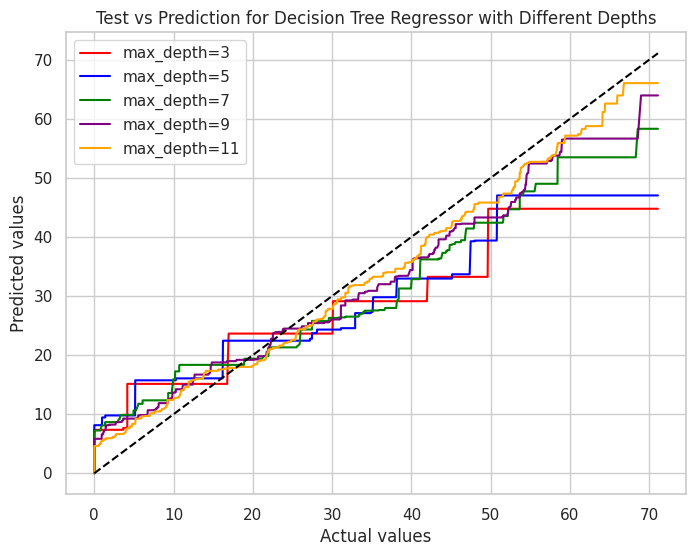

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Your data splitting and model fitting
# Assuming you have x_train, x_test, y_train, and y_test from your dataset

# Implement GridSearchCV to find the best max_depth for the decision tree
tree = DecisionTreeRegressor()
param_grid = {'max_depth': [3, 5, 7, 9, 11]}
tree_cv = GridSearchCV(tree, param_grid, cv=10)
tree_cv.fit(x_train, y_train)

# Predict on testing data for each max_depth value
max_depth_values = [3, 5, 7, 9, 11]
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(8, 6))

for depth, color in zip(max_depth_values, colors):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    plt.plot(np.sort(y_test), np.sort(y_pred), label=f'max_depth={depth}', color=color)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Test vs Prediction for Decision Tree Regressor with Different Depths')
plt.legend()
plt.show()


Enssamble Learning method (XGBoost)implementation

XGBOOST runtime: 0.0 mins


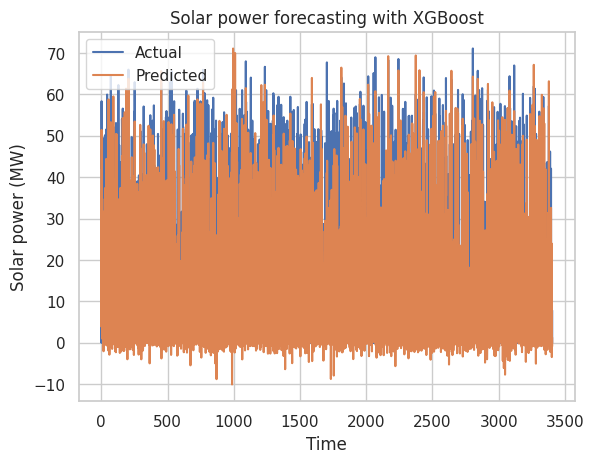

Mean Square Error      = 94.44362874149769
Root Mean Square Error = 9.718211190414504
Mean Absolute Error    = 5.733344203554934
Median Absolute Error  = 2.199369430541992
R^2                    = 0.7496239402422249
Adjusted R^2           = 0.7476221180291779


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from time import time

def train_test_split(df, test_len=48):
    """
    split data into training and testing.
    """
    train, test = df[:-test_len], df[-test_len:]
    return train, test

def data_to_supervised(df, shift_by=1, target_var='power'):
    """
    Convert data into a supervised learning problem.
    """
    target = df[target_var][shift_by:].values
    dep = df.drop(target_var, axis=1).shift(-shift_by).dropna().values
    data = np.column_stack((dep, target))
    return data


def xgb_forecast(train, x_test):
    """
    XGBOOST model which outputs prediction and model.
    """
    x_train, y_train = train[:,:-1], train[:,-1]
    xgb_model = xgb.XGBRegressor(learning_rate=0.01, n_estimators=1500, subsample=0.8,
                                 colsample_bytree=1, colsample_bylevel=1,
                                 min_child_weight=20, max_depth=14, objective='reg:squarederror')
    xgb_model.fit(x_train, y_train)
    yhat = xgb_model.predict([x_test])
    return yhat[0], xgb_model

def walk_forward_validation(df):
    """
    A walk forward validation approach by scaling the data and changing into a supervised learning problem.
    """
    preds = []
    train, test = train_test_split(df)

    scaler = MinMaxScaler(feature_range=(0,1))
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)

    train_scaled_df = pd.DataFrame(train_scaled, columns = train.columns, index=train.index)
    test_scaled_df = pd.DataFrame(test_scaled, columns = test.columns, index=test.index)

    train_scaled_sup, test_scaled_sup = data_to_supervised(train_scaled_df), data_to_supervised(test_scaled_df)
    history = np.array([x for x in train_scaled_sup])

    for i in range(len(test_scaled_sup)):
        test_x, test_y = test_scaled_sup[i][:-1], test_scaled_sup[i][-1]
        yhat, xgb_model = xgb_forecast(history, test_x)
        preds.append(yhat)
        np.append(history,[test_scaled_sup[i]], axis=0)

    pred_array = test_scaled_df.drop("power", axis=1).to_numpy()
    pred_num = np.array([pred])
    pred_array = np.concatenate((pred_array, pred_num.T), axis=1)
    result = scaler.inverse_transform(pred_array)

    return result, test, xgb_model

if __name__ == '__main__':
    start_time = time()
    #xgb_pred, actual, xgb_model = walk_forward_validation(dropped_df_power)
    time_len = time() - start_time

    print(f'XGBOOST runtime: {round(time_len/60,2)} mins')

    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(x_train, y_train)

# Make predictions
    y_pred = xgb_model.predict(x_test)

# Calculate error metrics
'''   mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

# Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")'''

# Plot actual vs. predicted values
# Plot the actual and predicted solar power
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Solar power (MW)')
plt.title('Solar power forecasting with XGBoost')
plt.show()



def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_pred)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)


    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_pred)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_pred))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_pred)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_pred)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

    return sklm.mean_squared_error(y_true, y_pred), r2

y_score = xgb_model.predict(x_test)
y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics(y_test, y_score, 28)

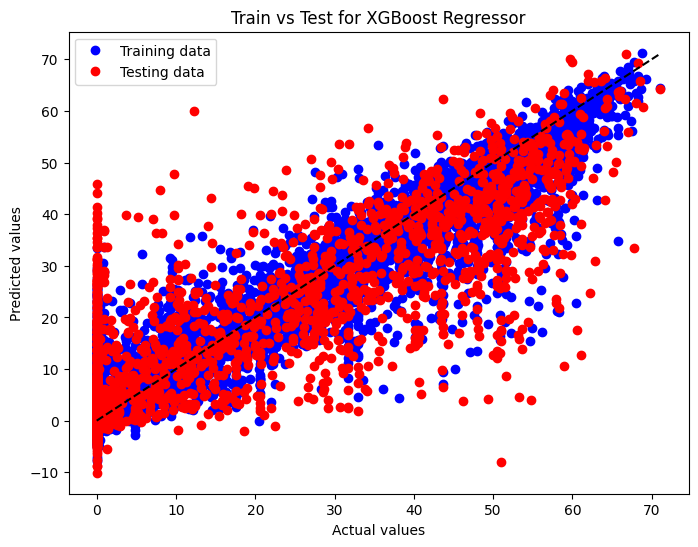

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Assuming you have your data split into x_train, x_test, y_train, and y_test

# Create and fit the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

# Predict on both training and testing data
y_pred_train = xgb_model.predict(x_train)
y_pred_test = xgb_model.predict(x_test)

# Plotting the train vs test plot in a line plot
plt.figure(figsize=(8, 6))

plt.plot(y_train, y_pred_train, 'o', label='Training data', color='blue')
plt.plot(y_test, y_pred_test, 'o', label='Testing data', color='red')

plt.title('Train vs Test for XGBoost Regressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')  # Diagonal line for comparison

plt.show()


In [ ]:
## Randomly sample cases to create independent training and test data
nr.seed(9922)
labels = np.array(df_weather_actual['power'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.25)
# print(indx)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train[:,10:])
x_train[:,10:] = scaler.transform(x_train[:,10:])
x_test[:,10:] = scaler.transform(x_test[:,10:])
print(x_train.shape)
x_train[:10,:]


(10214, 19)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.15409846,  0.03586713, -0.91935444, -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.42906665],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.37280275,  1.53016334, -0.91935444, -0.0062695 , -1.15013152,
        -0.53378234, -0.45787869, -0.28499319,  0.60281425],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.94201072,  0.03586713,  0.7647048 , -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.79334808],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.857

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=9922)
rf_regressor.fit(x_train, y_train)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=9922)
gb_regressor.fit(x_train, y_train)

# Evaluate models on the test data
rf_score = rf_regressor.score(x_test, y_test)
gb_score = gb_regressor.score(x_test, y_test)

print("Random Forest Regressor Score:", rf_score)
print("Gradient Boosting Regressor Score:", gb_score)

# Cross-validation scores for Random Forest
rf_cv_scores = cross_val_score(rf_regressor, x_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", np.mean(rf_cv_scores))

# Cross-validation scores for Gradient Boosting
gb_cv_scores = cross_val_score(gb_regressor, x_train, y_train, cv=5)
print("Gradient Boosting Cross-Validation Scores:", gb_cv_scores)
print("Gradient Boosting Mean CV Score:", np.mean(gb_cv_scores))




Random Forest Regressor Score: 0.7408962613805206
Gradient Boosting Regressor Score: 0.6739633850936084
Random Forest Cross-Validation Scores: [0.73594549 0.71261377 0.72660456 0.7186844  0.70583994]
Random Forest Mean CV Score: 0.7199376313678837
Gradient Boosting Cross-Validation Scores: [0.66338663 0.64590421 0.64986126 0.64826947 0.63535539]
Gradient Boosting Mean CV Score: 0.6485553923244237


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions for Random Forest
rf_pred = rf_regressor.predict(x_test)

# Predictions for Gradient Boosting
gb_pred = gb_regressor.predict(x_test)

# Calculate Mean Squared Error (MSE) for Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)

# Calculate Root Mean Squared Error (RMSE) for Random Forest
rf_rmse = np.sqrt(rf_mse)

# Calculate Mean Absolute Error (MAE) for Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)

# Calculate R-squared (R^2) for Random Forest
rf_r2 = r2_score(y_test, rf_pred)

# Calculate Adjusted R-squared (Adjusted R^2) for Random Forest
n = len(y_test)
p = x_test.shape[1]
rf_adj_r2 = 1 - ((1 - rf_r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error (MSE) for Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_pred)

# Calculate Root Mean Squared Error (RMSE) for Gradient Boosting
gb_rmse = np.sqrt(gb_mse)

# Calculate Mean Absolute Error (MAE) for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_pred)

# Calculate R-squared (R^2) for Gradient Boosting
gb_r2 = r2_score(y_test, gb_pred)

# Calculate Adjusted R-squared (Adjusted R^2) for Gradient Boosting
gb_adj_r2 = 1 - ((1 - gb_r2) * (n - 1) / (n - p - 1))

# Print the error metrics
print("Random Forest Regressor Metrics:")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R-squared (R^2): {rf_r2:.2f}")
print(f"Adjusted R-squared (Adjusted R^2): {rf_adj_r2:.2f}")
print("\nGradient Boosting Regressor Metrics:")
print(f"MSE: {gb_mse:.2f}")
print(f"RMSE: {gb_rmse:.2f}")
print(f"MAE: {gb_mae:.2f}")
print(f"R-squared (R^2): {gb_r2:.2f}")
print(f"Adjusted R-squared (Adjusted R^2): {gb_adj_r2:.2f}")


Random Forest Regressor Metrics:
MSE: 96.11
RMSE: 9.80
MAE: 5.33
R-squared (R^2): 0.74
Adjusted R-squared (Adjusted R^2): 0.74

Gradient Boosting Regressor Metrics:
MSE: 120.24
RMSE: 10.97
MAE: 6.90
R-squared (R^2): 0.67
Adjusted R-squared (Adjusted R^2): 0.67


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

# AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=9922)
adaboost_regressor.fit(x_train, y_train)

# Bagging Regressor
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=9922)
bagging_regressor.fit(x_train, y_train)

# Evaluate models on the test data
adaboost_score = adaboost_regressor.score(x_test, y_test)
bagging_score = bagging_regressor.score(x_test, y_test)

print("AdaBoost Regressor Score:", adaboost_score)
print("Bagging Regressor Score:", bagging_score)

# Cross-validation scores for AdaBoost
adaboost_cv_scores = cross_val_score(adaboost_regressor, x_train, y_train, cv=5)
print("AdaBoost Cross-Validation Scores:", adaboost_cv_scores)
print("AdaBoost Mean CV Score:", np.mean(adaboost_cv_scores))

# Cross-validation scores for Bagging
bagging_cv_scores = cross_val_score(bagging_regressor, x_train, y_train, cv=5)
print("Bagging Cross-Validation Scores:", bagging_cv_scores)
print("Bagging Mean CV Score:", np.mean(bagging_cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor Score: 0.528111351978279
Bagging Regressor Score: 0.5781663778970745


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Cross-Validation Scores: [0.54777539 0.53414274 0.53510807 0.52168057 0.50179128]
AdaBoost Mean CV Score: 0.5280996107675138


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Cross-Validation Scores: [0.57286529 0.56397976 0.56810053 0.56007565 0.54394016]
Bagging Mean CV Score: 0.5617922768962854


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions for AdaBoost
adaboost_pred = adaboost_regressor.predict(x_test)

# Predictions for Bagging
bagging_pred = bagging_regressor.predict(x_test)

# Calculate Mean Squared Error (MSE) for AdaBoost
adaboost_mse = mean_squared_error(y_test, adaboost_pred)

# Calculate Root Mean Squared Error (RMSE) for AdaBoost
adaboost_rmse = np.sqrt(adaboost_mse)

# Calculate Mean Absolute Error (MAE) for AdaBoost
adaboost_mae = mean_absolute_error(y_test, adaboost_pred)

# Calculate R-squared (R^2) for AdaBoost
adaboost_r2 = r2_score(y_test, adaboost_pred)

# Calculate Adjusted R-squared (Adjusted R^2) for AdaBoost
n = len(y_test)
p = x_test.shape[1]
adaboost_adj_r2 = 1 - ((1 - adaboost_r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error (MSE) for Bagging
bagging_mse = mean_squared_error(y_test, bagging_pred)

# Calculate Root Mean Squared Error (RMSE) for Bagging
bagging_rmse = np.sqrt(bagging_mse)

# Calculate Mean Absolute Error (MAE) for Bagging
bagging_mae = mean_absolute_error(y_test, bagging_pred)

# Calculate R-squared (R^2) for Bagging
bagging_r2 = r2_score(y_test, bagging_pred)

# Calculate Adjusted R-squared (Adjusted R^2) for Bagging
bagging_adj_r2 = 1 - ((1 - bagging_r2) * (n - 1) / (n - p - 1))

# Print the error metrics
print("AdaBoost Regressor Metrics:")
print(f"MSE: {adaboost_mse:.2f}")
print(f"RMSE: {adaboost_rmse:.2f}")
print(f"MAE: {adaboost_mae:.2f}")
print(f"R-squared (R^2): {adaboost_r2:.2f}")
print(f"Adjusted R-squared (Adjusted R^2): {adaboost_adj_r2:.2f}")
print("\nBagging Regressor Metrics:")
print(f"MSE: {bagging_mse:.2f}")
print(f"RMSE: {bagging_rmse:.2f}")
print(f"MAE: {bagging_mae:.2f}")
print(f"R-squared (R^2): {bagging_r2:.2f}")
print(f"Adjusted R-squared (Adjusted R^2): {bagging_adj_r2:.2f}")


AdaBoost Regressor Metrics:
MSE: 174.44
RMSE: 13.21
MAE: 9.19
R-squared (R^2): 0.53
Adjusted R-squared (Adjusted R^2): 0.53

Bagging Regressor Metrics:
MSE: 155.94
RMSE: 12.49
MAE: 7.84
R-squared (R^2): 0.58
Adjusted R-squared (Adjusted R^2): 0.58


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Base models for Stacking and Voting
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=9922)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=9922)),
    ('adaboost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=9922)),
    ('bagging', BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=9922))
]

# Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_regressor.fit(x_train, y_train)

# Voting Regressor
voting_regressor = VotingRegressor(estimators=base_models)
voting_regressor.fit(x_train, y_train)

# Evaluate models on the test data
stacking_score = stacking_regressor.score(x_test, y_test)
voting_score = voting_regressor.score(x_test, y_test)

print("Stacking Regressor Score:", stacking_score)
print("Voting Regressor Score:", voting_score)

# Cross-validation scores for Stacking
stacking_cv_scores = cross_val_score(stacking_regressor, x_train, y_train, cv=5)
print("Stacking Cross-Validation Scores:", stacking_cv_scores)
print("Stacking Mean CV Score:", np.mean(stacking_cv_scores))

# Cross-validation scores for Voting
voting_cv_scores = cross_val_score(voting_regressor, x_train, y_train, cv=5)
print("Voting Cross-Validation Scores:", voting_cv_scores)
print("Voting Mean CV Score:", np.mean(voting_cv_scores))




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Stacking Regressor Score: 0.7441572672995087
Voting Regressor Score: 0.674178078201368


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Stacking Cross-Validation Scores: [0.73997617 0.71135577 0.72610778 0.71803345 0.71294142]
Stacking Mean CV Score: 0.7216829171507507


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Voting Cross-Validation Scores: [0.66693966 0.65224644 0.65990144 0.65635938 0.64118839]
Voting Mean CV Score: 0.6553270607700823


**LSTM Model Implementation**

In [ ]:
x_train.shape

(10214, 19)

In [ ]:
X_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
X_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
X_train.shape

(10214, 1, 19)

Epoch 1/40
852/852 [==============================] - 19s 7ms/step - loss: 334.9841 - val_loss: 243.7188
Epoch 2/40
852/852 [==============================] - 6s 7ms/step - loss: 207.9392 - val_loss: 177.1113
Epoch 3/40
852/852 [==============================] - 5s 6ms/step - loss: 171.5337 - val_loss: 155.8838
Epoch 4/40
852/852 [==============================] - 6s 7ms/step - loss: 158.3388 - val_loss: 146.3574
Epoch 5/40
852/852 [==============================] - 5s 6ms/step - loss: 151.5814 - val_loss: 140.6058
Epoch 6/40
852/852 [==============================] - 6s 7ms/step - loss: 146.8142 - val_loss: 137.0548
Epoch 7/40
852/852 [==============================] - 5s 6ms/step - loss: 143.0021 - val_loss: 134.7059
Epoch 8/40
852/852 [==============================] - 5s 6ms/step - loss: 139.8390 - val_loss: 132.9073
Epoch 9/40
852/852 [==============================] - 6s 7ms/step - loss: 137.2062 - val_loss: 131.3687
Epoch 10/40
852/852 [==============================] - 5s 6ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


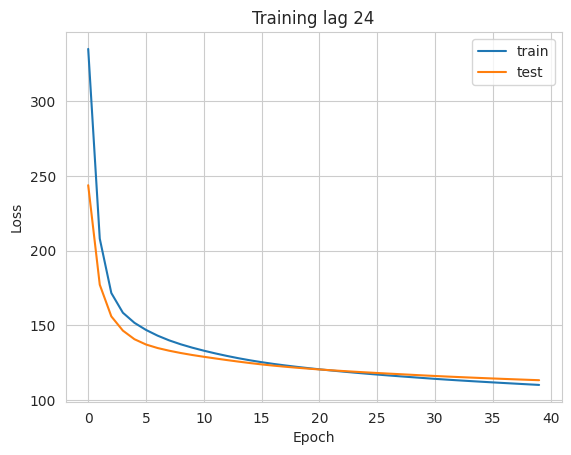

107/107 [==============================] - 2s 2ms/step
Mean Squared Error (MSE): 129.27
Root Mean Square Error (RMSE): 11.37
Mean Absolute Error (MAE): 6.41
Median Absolute Error (MedAE): 1.96
R-squared (R^2): 0.66
Adjusted R-squared (Adjusted R^2): 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: ignored

In [ ]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

def calculate_adjusted_r2(r2, n, p):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

def print_metrics(y_true, y_pred, num_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = calculate_adjusted_r2(r2, len(y_true), num_features + 1)

    print(f"Mean Squared Error (MSE): {float(mse):.2f}")
    print(f"Root Mean Square Error (RMSE): {float(rmse):.2f}")
    print(f"Mean Absolute Error (MAE): {float(mae):.2f}")
    print(f"Median Absolute Error (MedAE): {float(medae):.2f}")
    print(f"R-squared (R^2): {float(r2):.2f}")
    print(f"Adjusted R-squared (Adjusted R^2): {float(adjusted_r2):.2f}")


def LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=40, samples=24):
    # design network
    model = Sequential()
    model.add(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(samples, return_sequences=True))
    model.add(LSTM(samples))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)

    # uncomment to load
    model = load_model('/content/models/1699003215_model_24_lag.h5')

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.xlabel('Epoch')  # Add X label
    plt.ylabel('Loss')   # Add Y label
    plt.show()

  # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]
    print_metrics(y_test, y_score, X_train.shape[2])

    return mse, rmse, mae, medae, r2, adjusted_r2

    # Save all the results
    model_results_dict = {}
    model_results_dict['Algo'] = 'LSTM'
    model_results_dict['lag'] = samples
    model_results_dict['dropout'] = dropout_
    model_results_dict['epochs'] = epochs_
    model_results_dict['batch_size'] = batch_size_
    model_results_dict['loss'] = history.history
    model_results_dict['rmse'] = rmse
    model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
    model_results_dict['r2'] = r2
    model_results_dict['model_filename'] = filename
    model_results_dict['time_ran'] = int(time.time())
    model_results.append(model_results_dict)

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
mse, rmse, mae, medae, r2, adjusted_r2 = LSTM_model(X_train, y_train, X_test, y_test)


**LSTM with different hyperparameter**

Epoch 1/10
852/852 [==============================] - 110s 121ms/step - loss: 177.1666 - val_loss: 140.4707
Epoch 2/10
852/852 [==============================] - 102s 120ms/step - loss: 153.7786 - val_loss: 135.5209
Epoch 3/10
852/852 [==============================] - 101s 119ms/step - loss: 149.1116 - val_loss: 133.0560
Epoch 4/10
852/852 [==============================] - 102s 120ms/step - loss: 146.2219 - val_loss: 131.3556
Epoch 5/10
852/852 [==============================] - 104s 123ms/step - loss: 143.9377 - val_loss: 129.9701
Epoch 6/10
852/852 [==============================] - 102s 119ms/step - loss: 141.7454 - val_loss: 128.7344
Epoch 7/10
852/852 [==============================] - 103s 121ms/step - loss: 139.6026 - val_loss: 127.8476
Epoch 8/10
852/852 [==============================] - 102s 119ms/step - loss: 137.3851 - val_loss: 127.0695
Epoch 9/10
852/852 [==============================] - 104s 122ms/step - loss: 134.8101 - val_loss: 126.5766
Epoch 10/10
852/852 [=======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


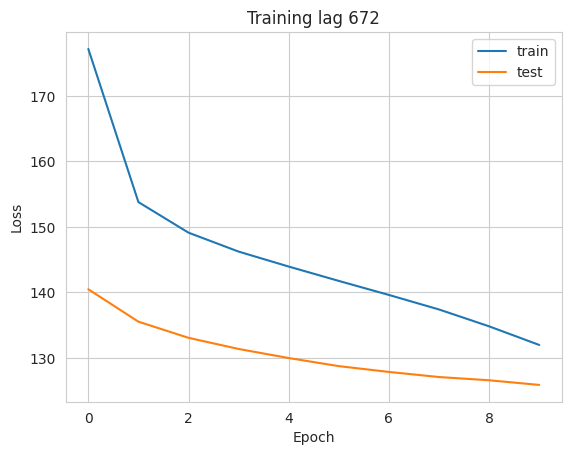

107/107 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 129.27
Root Mean Square Error (RMSE): 11.37
Mean Absolute Error (MAE): 6.41
Median Absolute Error (MedAE): 1.96
R-squared (R^2): 0.66
Adjusted R-squared (Adjusted R^2): 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: ignored

In [ ]:
batch_size_ = 12
dropout_ =0.33
epochs_ = 10
samples = 672

LSTM_model(X_train,y_train, X_test,y_test, batch_size_, dropout_, epochs_, samples)

In [ ]:
model_results


In [ ]:
new_res_df = pd.DataFrame(model_results)
# old_res_df = pd.read_csv('./result/result.csv', index_col=0)
# res_df = pd.concat([old_res_df, new_res_df], axis=0, sort=False).reset_index(drop=True)
new_res_df.to_csv('./result/result.csv')

In [ ]:
models_by_r2 = new_res_df.sort_values(by='r2', ascending=False)
models_by_r2.head()

In [ ]:
model_filename = models_by_r2['model_filename'].iloc[0]
if(model_filename.endswith('.pkl')):
    model = joblib.load('./models/'+ model_filename)
else:
    model = load_model('./models/'+ model_filename)

In [ ]:
df_forecast = pd.read_csv('weather_forecast.csv')
df_forecast.head()

# Concat y_hat to dataframe for later
#     lstm_test = pd.concat([lstm_test, pd.DataFrame(yhat, columns=['yhat'], index=lstm_test.index)], axis=1)

In [ ]:
x_train.shape


(10214, 19)

In [ ]:
X_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
X_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
X_train.shape

(10214, 1, 19)

BiDirectional LSTM model

Improved BIdirectional-LSTM Model

Epoch 1/30
852/852 [==============================] - 34s 15ms/step - loss: 261.0644 - val_loss: 170.2527
Epoch 2/30
852/852 [==============================] - 10s 11ms/step - loss: 163.2948 - val_loss: 145.8228
Epoch 3/30
852/852 [==============================] - 9s 10ms/step - loss: 151.8904 - val_loss: 137.9635
Epoch 4/30
852/852 [==============================] - 8s 10ms/step - loss: 146.7444 - val_loss: 134.0233
Epoch 5/30
852/852 [==============================] - 9s 10ms/step - loss: 143.0660 - val_loss: 131.3802
Epoch 6/30
852/852 [==============================] - 10s 11ms/step - loss: 140.0840 - val_loss: 129.3223
Epoch 7/30
852/852 [==============================] - 10s 12ms/step - loss: 137.4934 - val_loss: 127.7075
Epoch 8/30
852/852 [==============================] - 7s 9ms/step - loss: 135.1734 - val_loss: 126.5070
Epoch 9/30
852/852 [==============================] - 9s 10ms/step - loss: 133.0946 - val_loss: 125.6285
Epoch 10/30
852/852 [==============================]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


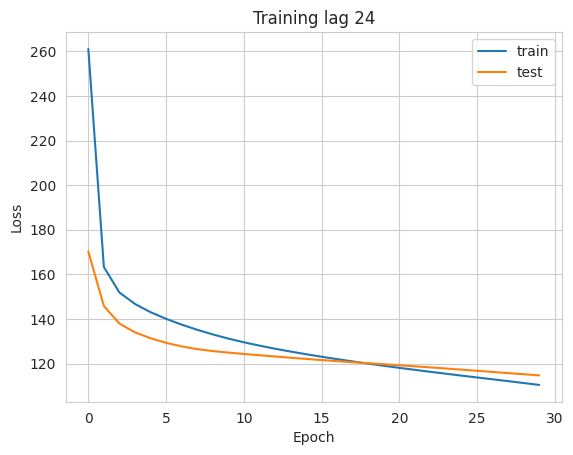

107/107 [==============================] - 2s 3ms/step
Mean Squared Error (MSE): 114.73
Root Mean Square Error (RMSE): 10.71
Mean Absolute Error (MAE): 5.82
Median Absolute Error (MedAE): 1.64
R-squared (R^2): 0.70
Adjusted R-squared (Adjusted R^2): 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: ignored

In [ ]:
from keras.layers import LSTM, Bidirectional

def Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=30, samples=24):
    # design network
    model = Sequential()
    model.add(Bidirectional(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
    model.add(Bidirectional(LSTM(samples, return_sequences=True)))
    model.add(Bidirectional(LSTM(samples)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_bidirectional_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)

    # uncomment to load
    model = load_model('/content/models/' + filename)

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.xlabel('Epoch')  # Add X label
    plt.ylabel('Loss')   # Add Y label
    plt.show()

  # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]
    print_metrics(y_test, y_score, X_train.shape[2])

    return mse, rmse, mae, medae, r2, adjusted_r2

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test)


**Hybrid Model using CNN-LSTM**